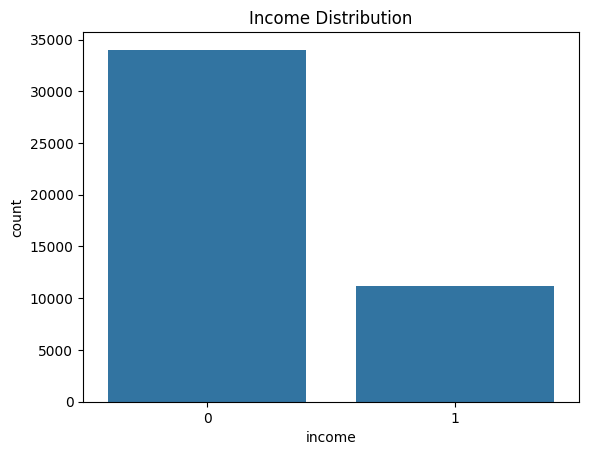

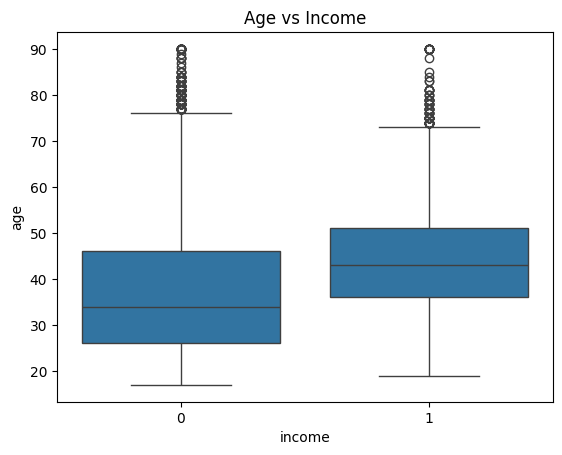

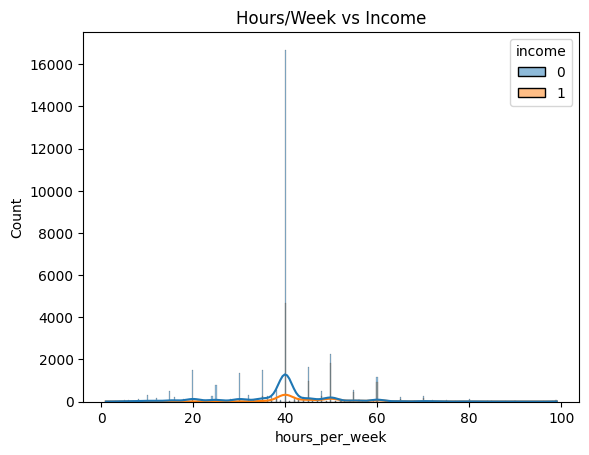

✅ Accuracy: 0.8679
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6842
           1       0.80      0.61      0.69      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.78      0.80      9045
weighted avg       0.86      0.87      0.86      9045



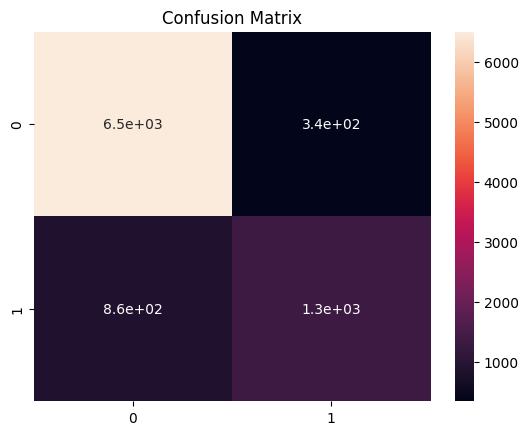

✅ Files saved.


In [11]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

# 📥 Load Data
df = pd.read_csv("adult.csv")
df.columns = df.columns.str.strip().str.lower().str.replace("-", "_")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Convert target
df["income"] = df["income"].str.strip().apply(lambda x: 1 if x == ">50K" else 0)

# 🔠 Encode categoricals
label_encoders = {}
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 📊 EDA
sns.countplot(data=df, x="income")
plt.title("Income Distribution")
plt.show()

sns.boxplot(data=df, x="income", y="age")
plt.title("Age vs Income")
plt.show()

sns.histplot(data=df, x="hours_per_week", hue="income", kde=True)
plt.title("Hours/Week vs Income")
plt.show()

# 🎯 Features and Target
X = df.drop("income", axis=1)
y = df["income"]
feature_names = X.columns.tolist()

# 🔧 Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# 📈 Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix")
plt.show()

# 💾 Save for Streamlit
joblib.dump(model, "salary_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(feature_names, "feature_names.pkl")
print("✅ Files saved.")
